Testing Pelican Observations

In [1]:
#from gym_plark.envs import plark_env_non_image_state
from gym_plark.envs import plark_env_guidedSonobuoy
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)
import time
from IPython.core.display import display, HTML
import helper
import datetime
import os
from stable_baselines import PPO2
from stable_baselines.common.env_checker import check_env


rewards={
        "illegal_move_reward": -.5,
        "end_turn_reward": -.1,
        "drop_buoy_reward": 1,
        "dropped_all_buoys_reward": 2,
        "buoy_too_close_reward": .1,
        "min_buoy_row": .3,
        "win_reward": 0.2,
        "lose_reward":-0.1
}

#env = plark_env_non_image_state.PlarkEnvNonImageState(config_file_path='/Components/plark-game/plark_game/game_config/10x10/balancedO.json',random_panther_start_position=True,  driving_agent='panther', normalise = False)
#env = plark_env_guidedSonobuoy.PlarkEnvGuidedSonobuoy(config_file_path='/Components/plark-game/plark_game/game_config/10x10/balancedO.json',
env = plark_env_guidedSonobuoy.PlarkEnvGuidedSonobuoy(config_file_path='/Components/plark-game/plark_game/game_config/10x10/balancedSporty.json',
                                                      random_panther_start_position=True,
                                                      driving_agent='pelican',
                                                      normalise = False,
                                                      rewards= rewards)

INFO:gym_plark.envs.plark_env:plark.kwargs :{'random_panther_start_position': True, 'driving_agent': 'pelican', 'normalise': False, 'render_height': 250, 'render_width': 310}


max_sb_range 17
current obs_shape : [35, 35, 50, 25, 35, 35, 2]
current size obs_shape : 7
0
1
2


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))



INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:5
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running


Initial observation: [15. 15. 36. 10.  7.  0.  0.  1. 10. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.  5.  1.  2.  1.  0. 36.
 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36.
 36.]
Taking action: 4
Got obs: [15. 15. 36.  9.  6.  1.  0.  1. 10. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.  5.  1.  2.  1.  0. 36.
 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36.
 36.]
Reward: 0
Info: {'turn': 0, 'illegal_move': False}


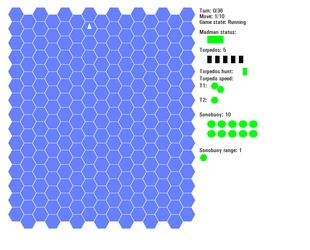

INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:4
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running


Taking action: 3
Got obs: [15. 15. 36.  8.  6.  2.  0.  1. 10. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.
 36. 36.  0. 36. 36.  0. 36. 36.  0. 36. 36.  0.  5.  1.  2.  1.  0. 36.
 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36.
 36.]
Reward: 0
Info: {'turn': 0, 'illegal_move': False}


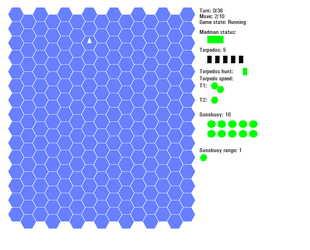

INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end


Taking action: 8


KeyboardInterrupt: 

In [4]:
import random
ob = env.reset()
print("Initial observation: {}".format(ob))
for j in range(25):
    action = random.randrange(9)
    print("Taking action: {}".format(action))
    ob, reward, done, info = env.step(action)
    print("Got obs: {}".format(ob))
    print("Reward: {}".format(reward))
    print("Info: {}".format(info))
    display(env.render())

In [ ]:
observation_space = env.observation_space
observation_space.shape[0]


In [5]:

env.reset()
check_env(env)
#model = helper.make_new_model("PPO2", "MlpPolicy", env)
# build pelican model
begin = time.time()
model = PPO2('MlpPolicy', env)


INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:1
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:5
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_torpedo
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:3
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_buoy
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:2
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:3
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:6
INFO:

In [6]:
model.learn(200)
r = env.get_episode_rewards()
print(len(r))



INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:1
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_torpedo
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:1
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:3
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_buoy
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:5
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:4
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INF

INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:4
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:2
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:5
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:4
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:2
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_torpedo
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:3
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_buoy
INFO:

141


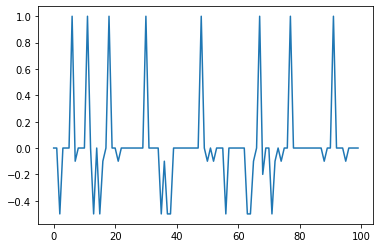

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(100), r[:100])


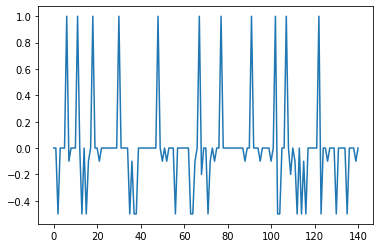

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(len(r)), r)


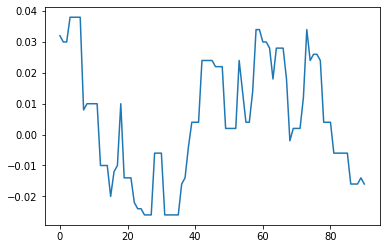

In [9]:
import numpy as np
def moving_average(x, window=10):
    result = [np.mean(x[i-window:i]) for i in range(window,len(x))]
    return result
mov = moving_average(r, 50)
plt.plot(range(len(mov)), mov)


In [10]:
video_path = '/data/test_video_omar/'
os.makedirs(video_path, exist_ok=True)
video_path =  os.path.join(video_path, 'test_newPelicanO.mp4')
basewidth,hsize = helper.make_video(model,env,video_path)

INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:6
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:4
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_buoy
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_buoy
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:2
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:6
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:end
INFO:gym_plark.envs.plark_env_guidedSonobuoy:State:  Running
INFO:gym_plark.envs.plark_env_guidedSonobuoy:Action:drop_tor

In [11]:
import io
import base64
from IPython.display import HTML
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" width="'''+str(basewidth)+'''" height="'''+str(hsize)+'''" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))